# Checkpoint Objective

In this checkpoint, we are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import graphviz

In [2]:
# Load dataset
dt = pd.read_csv('22.Titanic_Dataset_Cleaned_AmaniYch.csv')

In [3]:
dt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,1,28.0,0,0,13.0000,63,2
1,0,3,1,25.0,0,0,7.6500,140,2
2,0,3,1,20.0,0,0,7.8542,47,2
3,0,3,0,29.0,0,4,21.0750,47,2
4,0,1,1,31.0,1,0,52.0000,38,2
...,...,...,...,...,...,...,...,...,...
886,1,2,0,14.0,1,0,30.0708,145,0
887,0,3,1,22.0,0,0,7.2292,63,0
888,0,3,0,30.0,0,0,8.6625,47,2
889,0,3,1,28.0,0,0,7.8958,145,2


# Part 1 Logistic Regression

#### 1. Apply logistic regression.

In [4]:
# Splitting the data
x = dt.drop(['Survived'], axis = 1)
x = StandardScaler().fit_transform(x)
y = dt.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [5]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_lreg_pred = lreg.predict(x_test)
acc_lreg = accuracy_score(y_test, y_lreg_pred)
print(f"Accuracy: {acc_lreg}")

Accuracy: 0.776536312849162


#### 2. Use confusion matrix to validate your model. 


<Axes: xlabel='Predicted', ylabel='Actual'>

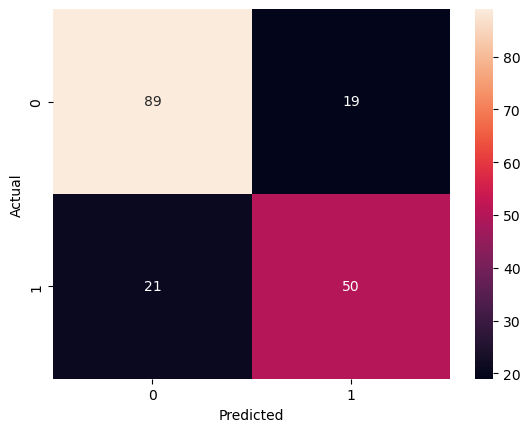

In [6]:
# Confusion matrix
confusion_matrix = pd.crosstab(y_test, y_lreg_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [7]:
# Classification report
print(classification_report(y_test, y_lreg_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       108
           1       0.72      0.70      0.71        71

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



#### 3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

ROC (Receiver Operating Characteristic) and AUC (Area Under the ROC Curve) are evaluation metrics commonly used in binary classification problems to assess the performance of a classification model

The ROC curve shows how a binary classifier's sensitivity (TPR) and specificity (1 - FPR) change with different decision thresholds. AUC quantifies the overall classifier performance, with 1 indicating a perfect classifier and 0.5 implying random guessing.

The AUC is a scalar value that represents the overall performance of a classifier. It quantifies the area under the ROC curve.Its value ranges from 0 to 1, where 0 indicates a poor classifier, and 1 indicates a perfect classifier.

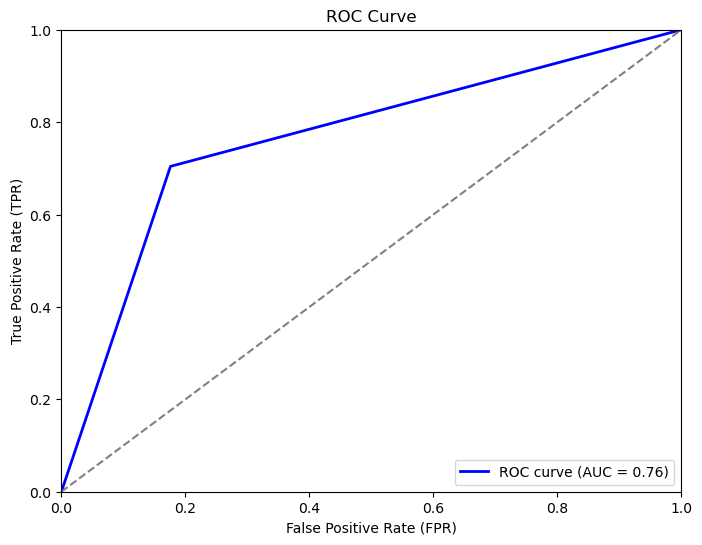

In [8]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_lreg_pred)

# Calculate the AUC
auc = roc_auc_score(y_test, y_lreg_pred)

# Plot the ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', lw = 2, label = f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'gray', linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

# Part 2 KNN

#### 1.  Apply the KNN and predict your model

In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_knn_pred = knn.predict(x_test)
print('Acuuracy', accuracy_score(y_knn_pred, y_test))

Acuuracy 0.7597765363128491


In [10]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
y_knn_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_knn_pred, y_test)
print('Acuuracy', acc_knn)

Acuuracy 0.7877094972067039


#### 2. Choose the optimal number of neighbors

In [11]:
# Using the cross validation method
cv_scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = cv_scores.index(max(cv_scores)) + 1
print("Optimal number of neighbors:", optimal_k)


Optimal number of neighbors: 4


In [12]:
n_neighbors = 30
scores = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('Accuracy for k = ',k,'is:',round(accuracy_score(y_pred, y_test),2))
    scores.append(round(accuracy_score(y_pred, y_test),2))

Accuracy for k =  1 is: 0.78
Accuracy for k =  2 is: 0.78
Accuracy for k =  3 is: 0.79
Accuracy for k =  4 is: 0.78
Accuracy for k =  5 is: 0.78
Accuracy for k =  6 is: 0.78
Accuracy for k =  7 is: 0.79
Accuracy for k =  8 is: 0.8
Accuracy for k =  9 is: 0.79
Accuracy for k =  10 is: 0.79
Accuracy for k =  11 is: 0.78
Accuracy for k =  12 is: 0.78
Accuracy for k =  13 is: 0.78
Accuracy for k =  14 is: 0.78


# Part 3:  Decision tree and random forest

#### 1. Apply decision tree and predict you model

In [13]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_dtc_pred = dtc.predict(x_test)
print(f'Accuarcy: {accuracy_score(y_dtc_pred, y_test)}')

Accuarcy: 0.776536312849162


#### 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

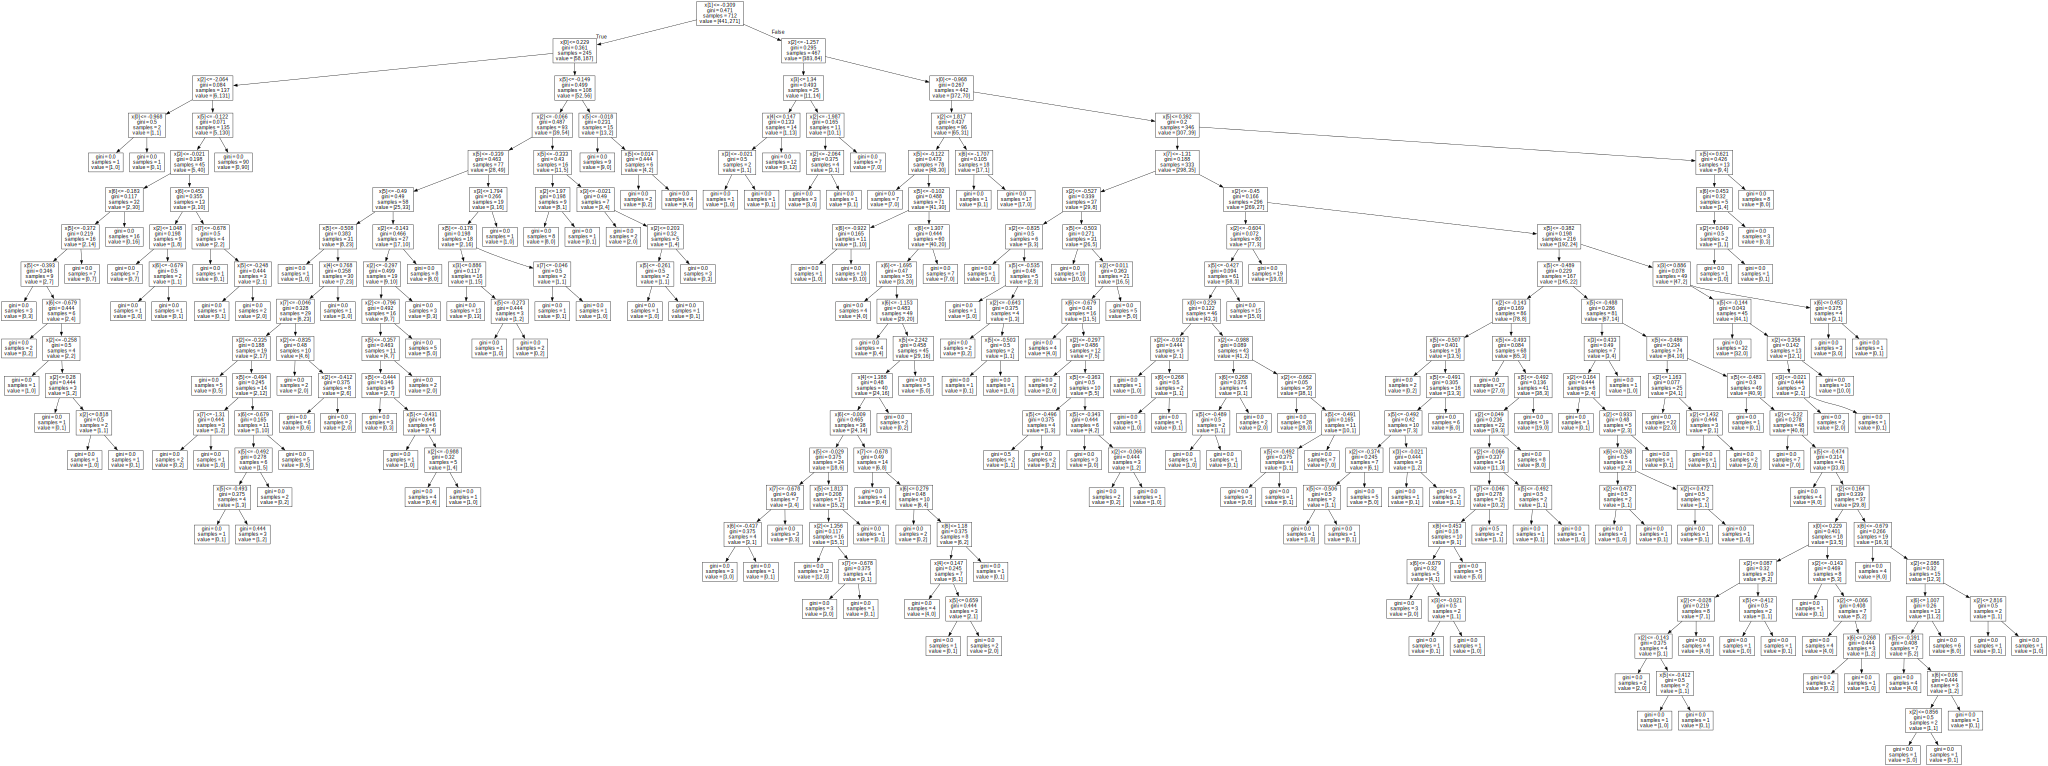

In [14]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file = None)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

#### 3. Change the decision tree parameters(change at least two parameters)

In [15]:
dtc = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)
dtc.fit(x_train, y_train)
y_dtc_pred = dtc.predict(x_test)

#### 4. Calculate the new accuracy and compare it with the previous results. 

In [16]:
acc_dtc = accuracy_score(y_dtc_pred, y_test)
print(f'Accuarcy: {acc_dtc}')
# The new parameters gave better

Accuarcy: 0.8044692737430168


#### 5. Use random forest then change the number of estimators

In [17]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_rfc_pred = rfc.predict(x_test)
print(f'Accuracy: {accuracy_score(y_rfc_pred, y_pred)}')

Accuracy: 0.8659217877094972


In [18]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rfc.fit(x_train, y_train)
y_rfc_pred = rfc.predict(x_test)

#### 6. Calculate the new accuracy and compare it with the previous result.

In [19]:
acc_rfc = accuracy_score(y_rfc_pred, y_pred)
print(f'Accuracy: {acc_rfc}')
# The results are better

Accuracy: 0.9162011173184358


# Now to finalize your project, 
#### make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant

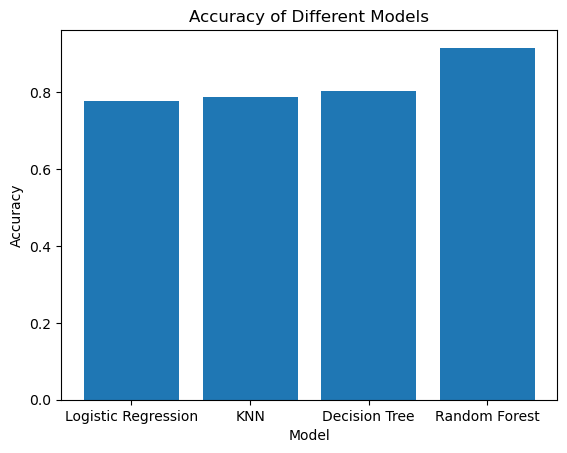

In [20]:
accuracies = [acc_lreg, acc_knn, acc_dtc, acc_rfc]
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()
